**QUESTION 2**

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


In [179]:
data= pd.read_csv('/content/onlinefoods.csv')

In [84]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


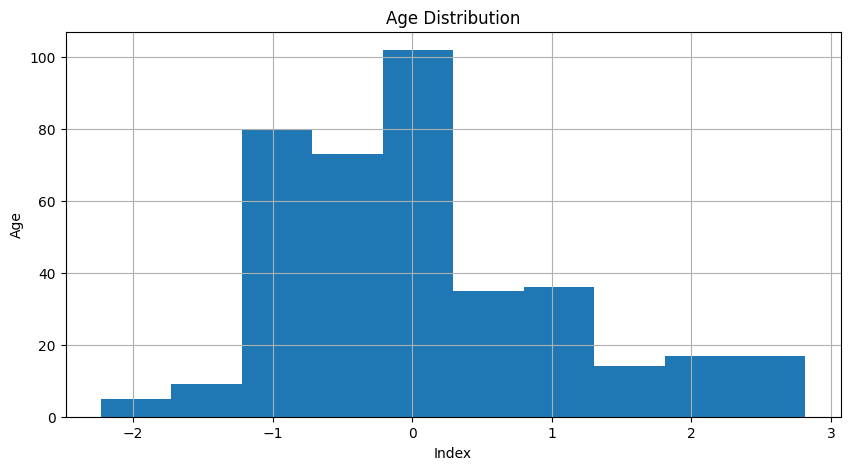

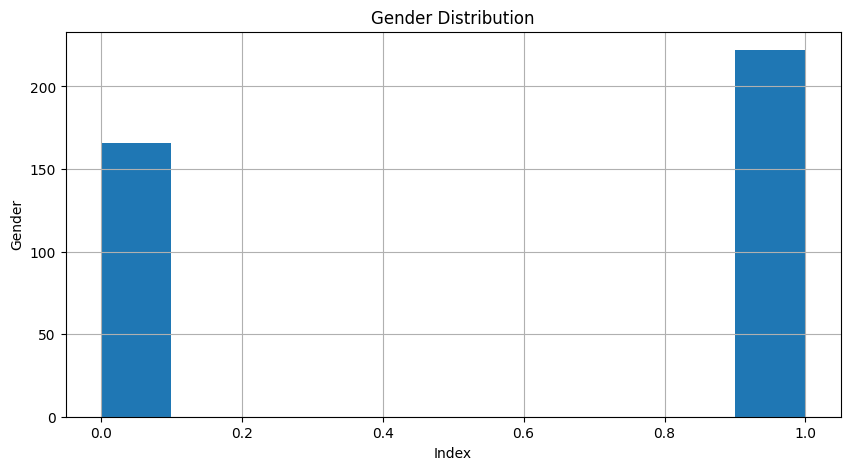

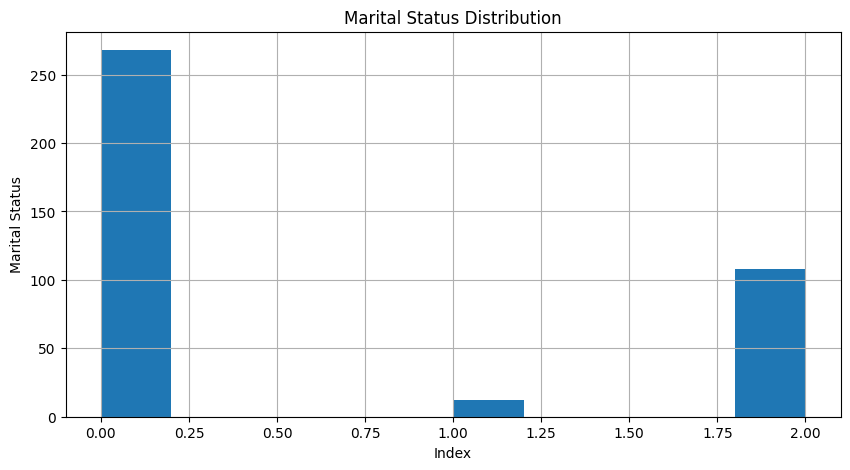

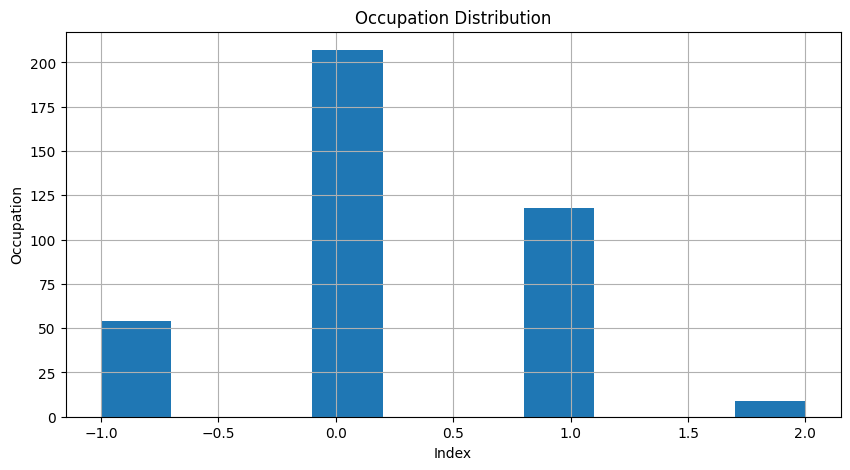

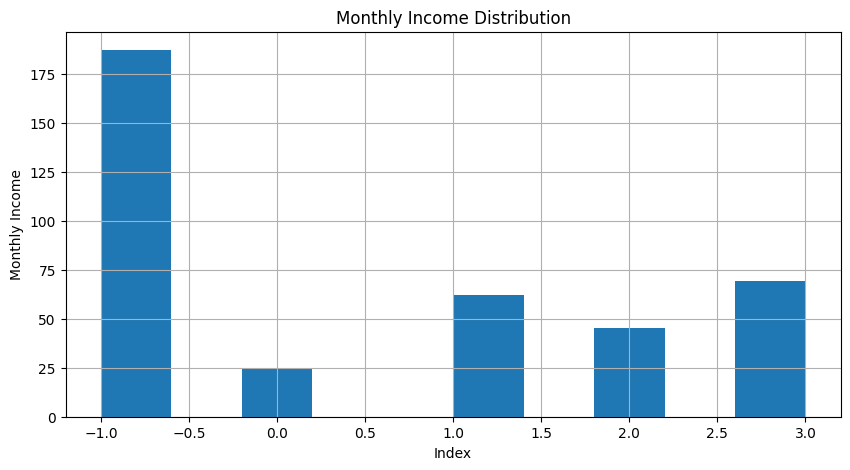

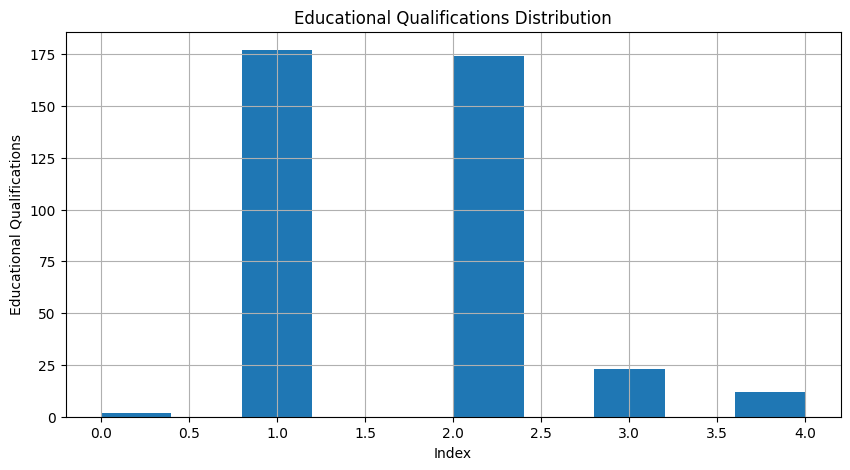

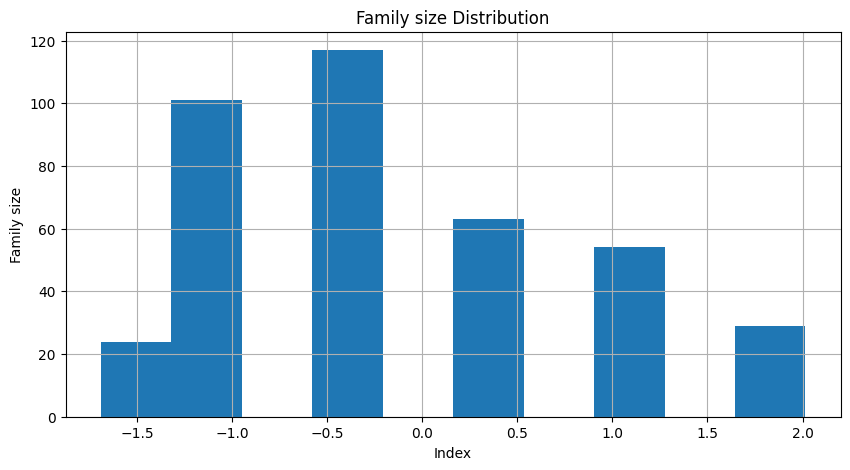

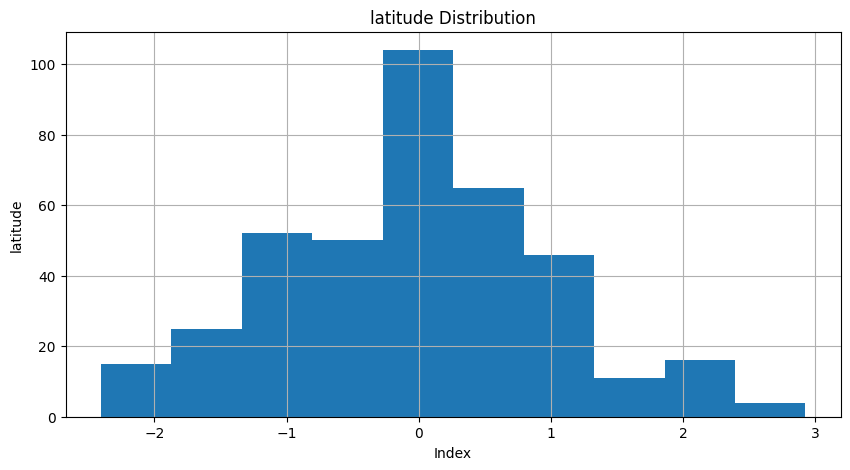

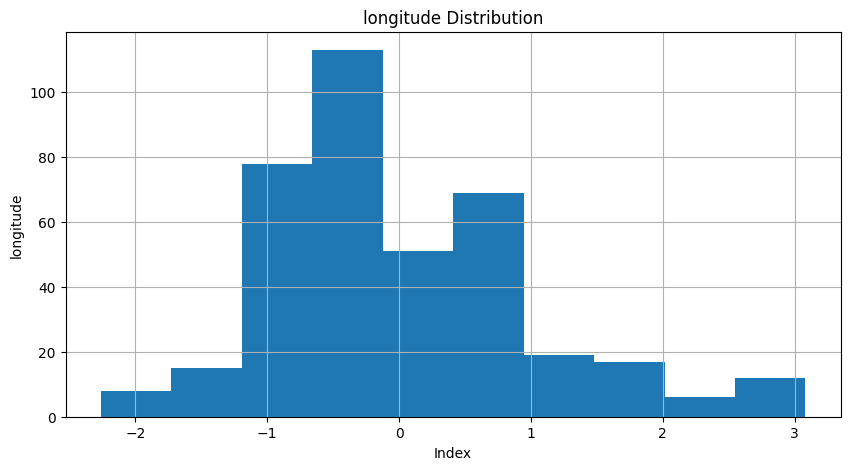

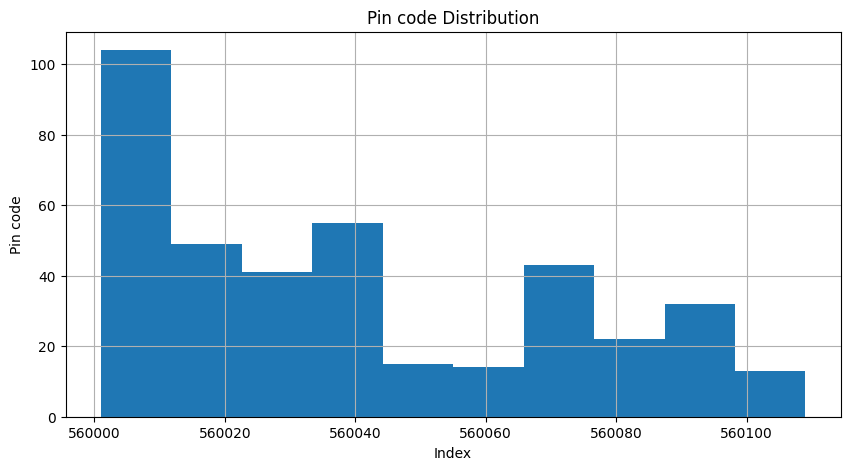

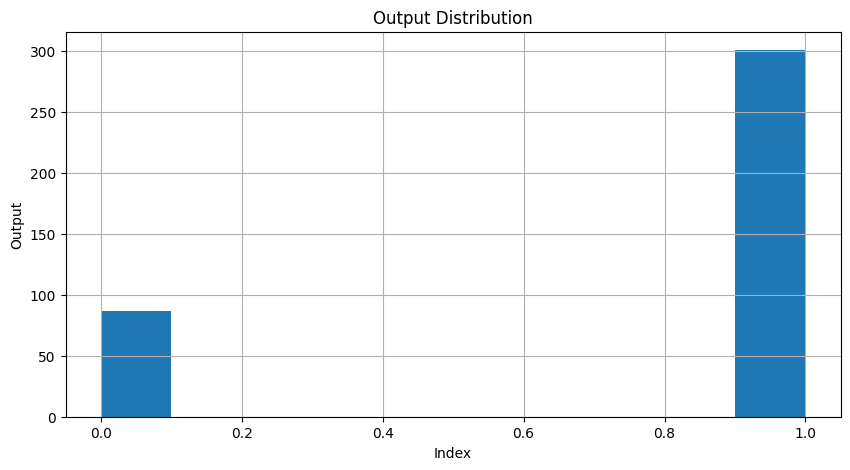

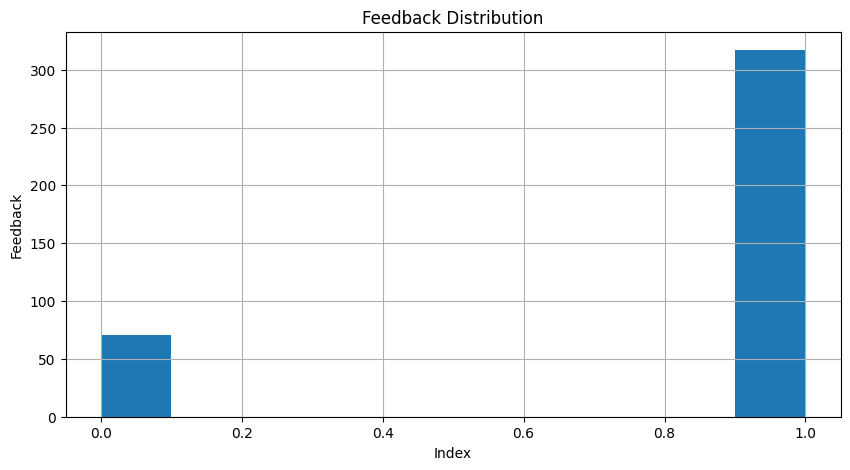

In [295]:
# Function to plot pie chart
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    data[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()


def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    data[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# Plotting for each column
for col in data.columns:
    if data[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)


In [180]:
print(data.columns)


Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')


In [181]:
data = data.drop('Unnamed: 12', axis=1)


We are dropping the unnamed column.
We also asssign all the string values a numerical, in order to have more fearures for an accurate prediction.
Converting string values to numerical format is important because many machine learning algorithms require numerical inputs. By encoding categorical variables (strings) into numerical values, we can represent these variables in a way that the algorithm can understand and use for making predictions. There are several encoding techniques available, such as label encoding and one-hot encoding, each suitable for different types of categorical variables and machine learning algorithms.

In [182]:
# Define mapping for all unique values in the dataset
mapping = {
    'No Income': -1,
    'Below Rs.10000': 0,
    'More than 50000': 1,
    '10001 to 25000': 2,
    '25001 to 50000': 3,
    'unknown': 4,
    'Female': -1,
    'Male': 1,
    'Single': -1,
    'Married': 1,
    'Prefer not to say':0,
    'Student': 0,
    'Employee': 1,
    'House wife':2,
     'Self Employeed':-1,
    'Post Graduate': 1,
    'Graduate': 0,
    'Uneducated':-1,
    'Ph.D':2,
    'School':3,
    'Positive': 1,
    'Negative ': -1,
    'Yes': 1,
    'No': -1
}

# Replace values in all columns using the mapping
data.replace(mapping, inplace=True)

# Verify the conversion
print(data.head())


   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20      -1              -1           0              -1   
1   24      -1              -1           0               0   
2   22       1              -1           0               0   
3   22      -1              -1           0              -1   
4   22       1              -1           0               0   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           1            4   12.9766    77.5993    560001   
1                           0            3   12.9770    77.5773    560009   
2                           1            3   12.9551    77.6593    560017   
3                           0            6   12.9473    77.5616    560019   
4                           1            4   12.9850    77.5533    560010   

   Output  Feedback  
0       1         1  
1       1         1  
2       1        -1  
3       1         1  
4       1         1  


In [290]:
# Identify columns with missing values
columns_with_missing = data.columns[data.isnull().any()]
print("Columns with missing values:", columns_with_missing)

# Impute missing values for numerical columns with the mean
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Verify that there are no more missing values
print("Columns with missing values after imputation:", data.columns[data.isnull().any()])


Columns with missing values: Index([], dtype='object')
Columns with missing values after imputation: Index([], dtype='object')


In [291]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])
data['Educational Qualifications'] = encoder.fit_transform(data['Educational Qualifications'])
data['Output'] = encoder.fit_transform(data['Output'])
data['Feedback'] = encoder.fit_transform(data['Feedback'])

In [186]:
scaler = StandardScaler()
data[['Age', 'Family size', 'latitude', 'longitude']] = scaler.fit_transform(data[['Age', 'Family size', 'latitude', 'longitude']])


In [187]:
X = data.drop(['Monthly Income'], axis=1)
y = data['Monthly Income']

In [188]:
# Splitting the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
# Training and testing the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Perceptron": Perceptron(),
    "MLP": MLPClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

In [29]:
data = pd.get_dummies(data)

In [257]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}, Accuracy: {accuracy}")

Model: Logistic Regression, Accuracy: 0.5897435897435898
Model: Perceptron, Accuracy: 0.10256410256410256
Model: MLP, Accuracy: 0.5897435897435898
Model: KNN, Accuracy: 0.5897435897435898
Model: SVM, Accuracy: 0.5897435897435898
Model: Naive Bayes, Accuracy: 0.6666666666666666


In [233]:
# Performance evaluation using classification report
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}\n{classification_report(y_test, y_pred)}")

Model: Logistic Regression
              precision    recall  f1-score   support

          -1       0.59      1.00      0.74        46
           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8

    accuracy                           0.59        78
   macro avg       0.12      0.20      0.15        78
weighted avg       0.35      0.59      0.44        78

Model: Perceptron
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        46
           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.10      1.00      0.19         8
           3       0.00      0.00      0.00         8

    accuracy                           0.10        78
   macro avg       0.02      0.20      0.04        78
weighted avg       0.01      0.1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**ROC CURVES**


ROC (Receiver Operating Characteristic) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the ROC curve (AUC) is a measure of the classifier's ability to distinguish between classes. An AUC of 1.0 indicates a perfect classifier, while an AUC of 0.5 indicates a classifier that performs no better than random chance.

In [274]:
y_test_array = y_test.values.ravel()

AUC: 0.41


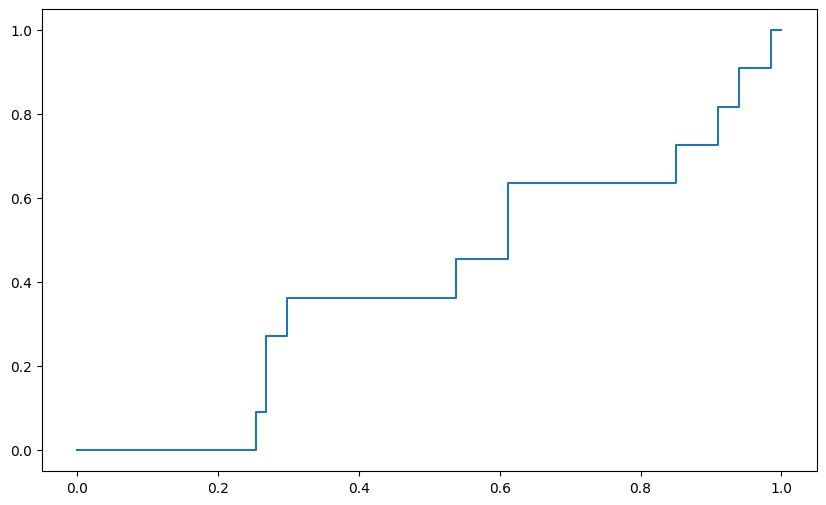

In [265]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve for all models
plt.figure(figsize=(10, 6))

# Logistic Regression
y_pred_prob = models["Logistic Regression"].predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_array, y_pred_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
# Assuming roc_auc contains the AUC value
formatted_auc = f"{roc_auc:.2f}"
print(f"AUC: {formatted_auc}")
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")

#An AUC of 0.41 indicates that the performance of the model, as measured by the ROC curve, is not very strong.
#This suggests that the model may not be effectively distinguishing between the positive and negative classes.


AUC: 0.50


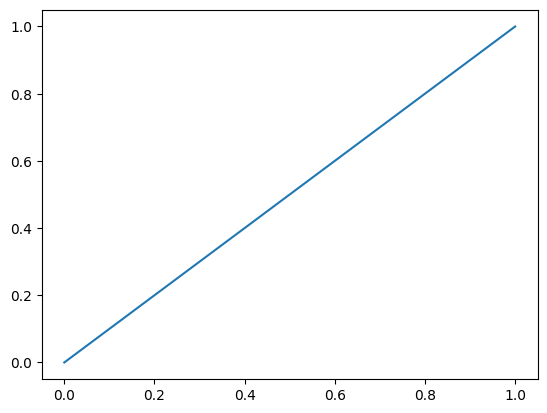

In [266]:
# MLP
y_pred_prob = models["MLP"].predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_array, y_pred_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
# Assuming roc_auc contains the AUC value
formatted_auc = f"{roc_auc:.2f}"
print(f"AUC: {formatted_auc}")

plt.plot(fpr, tpr, label=f"MLP (AUC = {roc_auc:.2f})")

AUC: 0.55


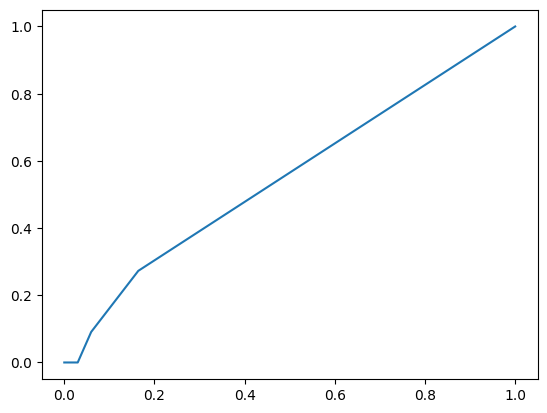

In [267]:
# KNN
y_pred_prob = models["KNN"].predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_array, y_pred_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
# Assuming roc_auc contains the AUC value
formatted_auc = f"{roc_auc:.2f}"
print(f"AUC: {formatted_auc}")

plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")

In [279]:
import numpy as np

# Map -1 to 0 and other values to 1
y_test_array = np.where(y_test_array == -1, 0, 1)

# Now y_test_binary should contain binary labels (0 or 1)
print(y_test_binary)


[1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 1]


In [281]:
y_test_array = y_test_array[0]

In [282]:
# SVM
y_pred_score = models["SVM"].decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test_array, y_pred_score, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")


ValueError: unknown format is not supported

In [293]:
fpr_train, tpr_train, _ = roc_curve(y_test_binary, y_pred_score, pos_label=1)


ValueError: unknown format is not supported

In [ ]:
# Perceptron
y_pred_score = models["Perceptron"].decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test_array, y_pred_score, pos_label=1)
roc_auc = auc(fpr, tpr)
formatted_auc = f"{roc_auc:.2f}"
print(f"AUC: {formatted_auc}")
plt.plot(fpr, tpr, label=f"Perceptron (AUC = {roc_auc:.2f})")

In [294]:
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (Train) (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (Test) (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)-LR')
plt.legend(loc="lower right")
plt.show()

NameError: name 'fpr_train' is not defined

**Ignoring the class label and performing the clustering task. **

In [287]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Xcontains the features
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Measuring the performance of the clustering
#The silhouette_score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation), and a higher score indicates better clustering performance.
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6120868384562556
